In [1]:
#1.Importing Libraries

import pandas as pd
import numpy as np
import sweetviz
from feature_engine.outliers import Winsorizer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import pickle

C:\Users\G0d\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df=pd.read_csv(r"C:\Users\G0d\Downloads\archive (5)\weather_classification_data.csv")

In [4]:
#3.Exploratory Data Analysis

report=sweetviz.analyze(df)
report.show_html("EDA report.html")

                                             |                                             | [  0%]   00:00 ->…

Report EDA report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


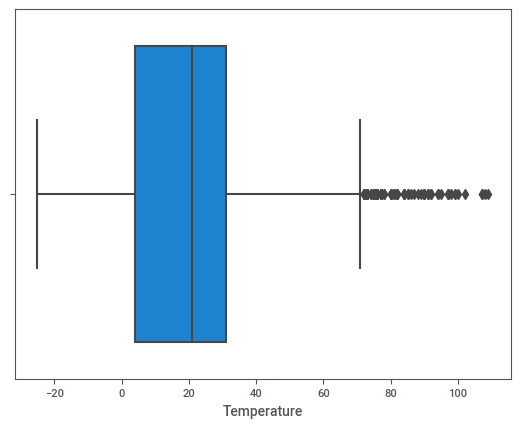

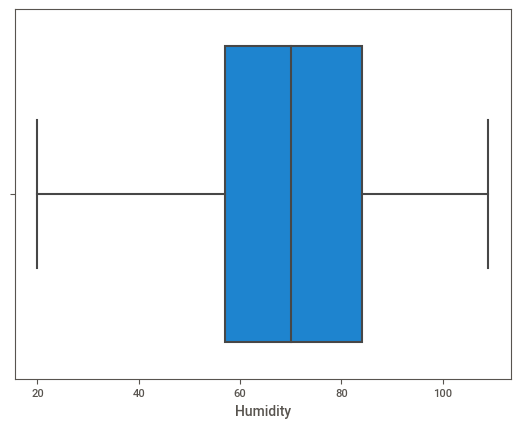

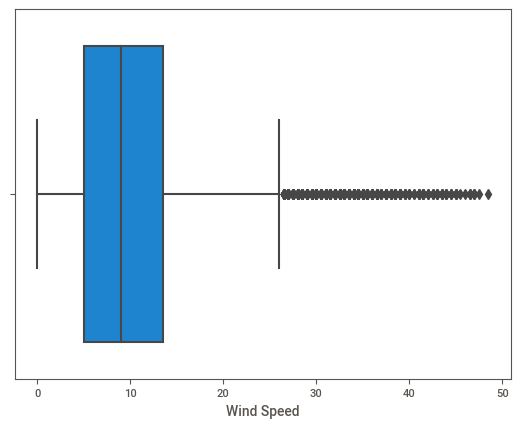

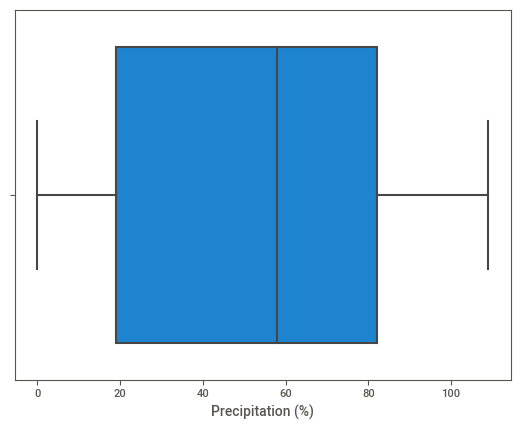

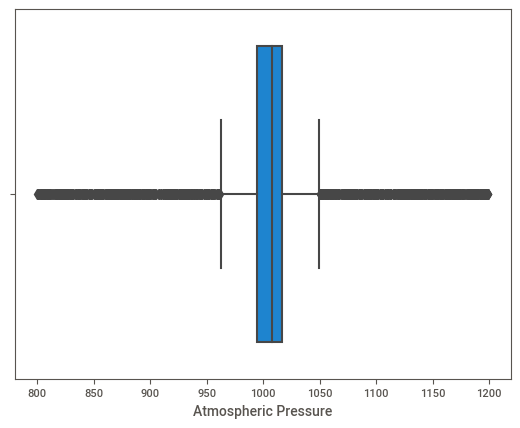

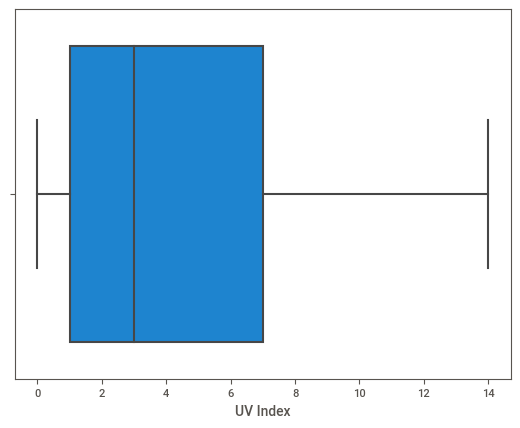

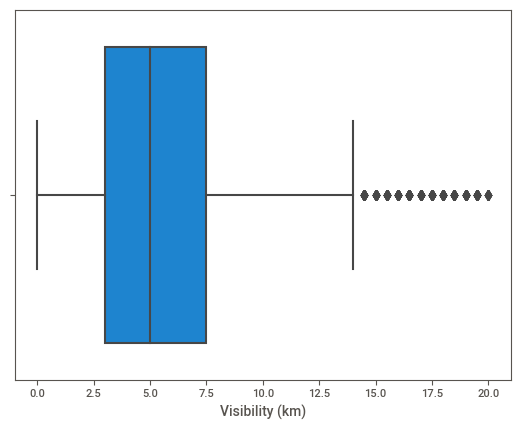

In [5]:
#Checking for the outliers
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [6]:
#Removing Outliers
win=Winsorizer(capping_method='iqr',tail='both',fold=0.05)
df['Temperature']=win.fit_transform(df[["Temperature"]])
df['Wind Speed']=win.fit_transform(df[["Wind Speed"]])
df['Atmospheric Pressure']=win.fit_transform(df[["Atmospheric Pressure"]])
df['Visibility (km)']=win.fit_transform(df[["Visibility (km)"]])

In [7]:
#4.Declaring the feature and target variables
X=df.drop("Weather Type",axis=1)    #Feature variables
y=df["Weather Type"]                #Target Variable

#5.Sparating training and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=23)

#6.Feature Engineering
num=["Temperature","Humidity","Wind Speed","Precipitation (%)","Atmospheric Pressure","UV Index","Visibility (km)"]
nominal=["Cloud Cover","Location"]
ordinal=["Season"]

#7.Pipeline creation
Numerical=Pipeline([("Mean Imputation",SimpleImputer()),
                   ("Scaling",StandardScaler())]) 
Nominal=Pipeline([('Mode Imputation',SimpleImputer(strategy="most_frequent")),
                ('encoding',OneHotEncoder(drop="first"))])          
Ordinal=Pipeline([('Mode Imputation',SimpleImputer(strategy="most_frequent")),
                 ('encoding',OrdinalEncoder())])

Preprocess = ColumnTransformer([
    ("Numerical/Continuous", StandardScaler(), num),
    ("Nominal", OneHotEncoder(handle_unknown='ignore'), nominal),
    ("Ordinal", OneHotEncoder(handle_unknown='ignore'), ordinal)
])



In [8]:
#Model Training 
lr=Pipeline([('Preprocessing',Preprocess),
         ("Model",LogisticRegression())])
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.8852272727272728

In [9]:
sv=Pipeline([('Preprocessing',Preprocess),
         ("Model",SVC())])
sv.fit(X_train,y_train)
y_pred=sv.predict(X_test)
accuracy_score(y_test,y_pred)

0.9022727272727272

In [15]:
#Pickling the High Accuracy Model to predict
pickle.dump(sv,open("weather.pkl","wb"))

In [10]:
knn=Pipeline([('Preprocessing',Preprocess),
         ("Model",KNeighborsClassifier())])
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8909090909090909

In [11]:
rf=Pipeline([('Preprocessing',Preprocess),
         ("Model",RandomForestClassifier())])
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9071969696969697

In [12]:
nb=Pipeline([('Preprocessing',Preprocess),
         ("Model",GaussianNB())])
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)
accuracy_score(y_test,y_pred)

0.8204545454545454

In [14]:
gc=Pipeline([('Preprocessing',Preprocess),
         ("Model",GradientBoostingClassifier())])
gc.fit(X_train,y_train)
y_pred=gc.predict(X_test)
accuracy_score(y_test,y_pred)

0.9102272727272728

In [13]:
dt=Pipeline([('Preprocessing',Preprocess),
         ("Model",DecisionTreeClassifier())])
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.8996212121212122